# KNN

Objective: 

The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

Dataset:

Need to Classify the animal type

Tasks:

1. Analyse the data using the visualizations

2. Preprocess the data by handling missing values & Outliers, if any.

3. Split the dataset into training and testing sets (80% training, 20% testing).

4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

5. Choose an appropriate distance metric and value for K.

6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

7. Visualize the decision boundaries of the classifier.

Interview Questions:

1. What are the key hyperparameters in KNN?

2. What distance metrics can be used in KNN?



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\DS assignments\Zoo.csv")

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# data transformation

In [4]:
#  label encode for animal name column

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df["animal name"] = le.fit_transform(df["animal name"])

df


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [20]:
df.describe()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,49.257426,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.006274,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,28.968829,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.021498,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,74.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.079208,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [22]:
df.shape

(101, 18)

# EDA

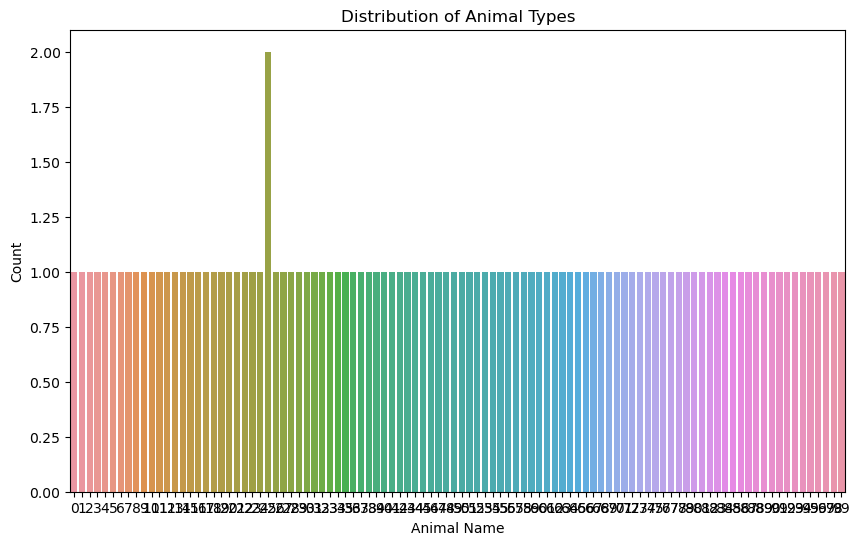

In [5]:
# Analyse the data using the visualizations.

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of animal types
plt.figure(figsize=(10, 6))
sns.countplot(x="animal name", data=df)
plt.xlabel("Animal Name")
plt.ylabel("Count")
plt.title("Distribution of Animal Types")
plt.show()



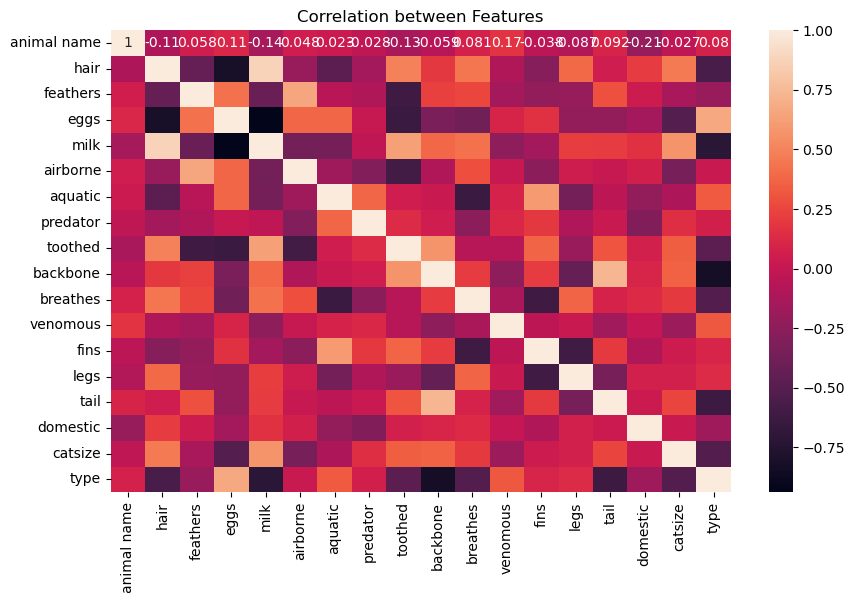

In [6]:
# Correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between Features")
plt.show()


In [7]:
# Handling missing values
df.isnull().sum()


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
# 1. Drop rows with missing values
df = df.dropna()


In [9]:
#defining numerical columns
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

# Boxplots

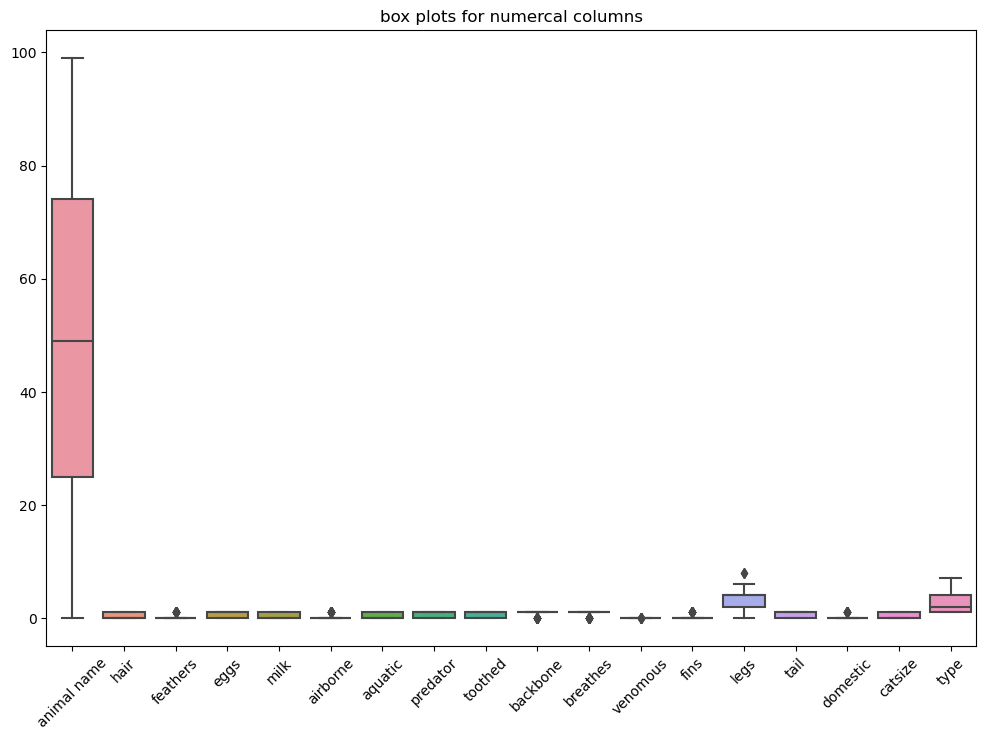

In [23]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numerical_columns])
plt.title("box plots for numercal columns")
plt.xticks(rotation=45)
plt.show()


In [11]:
 # find outliers in all columns

import pandas as pd

# Define a function to check for outliers using the interquartile range (IQR) method
def check_outliers(df, column):
    # Calculate the IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[~((df[column] >= lower_bound) & (df[column] <= upper_bound))]

    return outliers

# Check for outliers in all columns
outliers = {}
for column in df.columns:
    outliers[column] = check_outliers(df, column)

# Print the number of outliers in each column
for column, outlier_rows in outliers.items():
    print(f"Number of outliers in '{column}': {len(outlier_rows)}")

# Print the outlier rows for each column
for column, outlier_rows in outliers.items():
    if len(outlier_rows) > 0:
        print(f"Outliers in '{column}':")
        print(outlier_rows)


Number of outliers in 'animal name': 0
Number of outliers in 'hair': 0
Number of outliers in 'feathers': 20
Number of outliers in 'eggs': 0
Number of outliers in 'milk': 0
Number of outliers in 'airborne': 24
Number of outliers in 'aquatic': 0
Number of outliers in 'predator': 0
Number of outliers in 'toothed': 0
Number of outliers in 'backbone': 18
Number of outliers in 'breathes': 21
Number of outliers in 'venomous': 8
Number of outliers in 'fins': 17
Number of outliers in 'legs': 2
Number of outliers in 'tail': 0
Number of outliers in 'domestic': 13
Number of outliers in 'catsize': 0
Number of outliers in 'type': 0
Outliers in 'feathers':
     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
11            11     0         1     1     0         1        0         0   
16            16     0         1     1     0         1        0         1   
20            20     0         1     1     0         1        0         0   
21            21     0         1     1    

In [12]:
# replace the outliers with mean except type column.

import numpy as np

# Define a function to replace outliers with the mean
def replace_outliers_with_mean(df, column):
    # Calculate the mean and standard deviation
    mean = df[column].mean()
    std = df[column].std()

    # Define the lower and upper bounds
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Replace outliers with the mean
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean, df[column])

# Replace outliers in all columns except "animal type"
for column in df.columns:
    if column != "type":
        replace_outliers_with_mean(df, column)

# Print the updated DataFrame
print(df)


     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0            0.0   1.0       0.0   0.0   1.0       0.0      0.0       1.0   
1            1.0   1.0       0.0   0.0   1.0       0.0      0.0       0.0   
2            2.0   0.0       0.0   1.0   0.0       0.0      1.0       1.0   
3            3.0   1.0       0.0   0.0   1.0       0.0      0.0       1.0   
4            4.0   1.0       0.0   0.0   1.0       0.0      0.0       1.0   
..           ...   ...       ...   ...   ...       ...      ...       ...   
96          95.0   1.0       0.0   0.0   1.0       0.0      0.0       0.0   
97          96.0   1.0       0.0   1.0   0.0       1.0      0.0       0.0   
98          97.0   1.0       0.0   0.0   1.0       0.0      0.0       1.0   
99          98.0   0.0       0.0   1.0   0.0       0.0      0.0       0.0   
100         99.0   0.0       1.0   1.0   0.0       1.0      0.0       0.0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0

# standardization

In [13]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

SS_X  = SS.fit_transform(df.iloc[:,0:17])
SS_X


array([[-1.70884021,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-1.67414817,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-1.63945614, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.725671  , -0.86103386,  2.01246118, ...,  0.58878406,
        -0.38435306, -0.87859537]])

# KNN model fitting

# Choosing an appropriate distance metric and value for K.

# Split the data into training and testing sets

In [14]:
# spliting the data in x and y
Y = df['type']
X = SS_X


In [15]:
X

array([[-1.70884021,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-1.67414817,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-1.63945614, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.725671  , -0.86103386,  2.01246118, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [16]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model fitting
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, Y_train)

# Predict the labels for the training data
Y_train_pred = knn.predict(X_train)

# Predict the labels for the test data
Y_test_pred = knn.predict(X_test)


# Calculate the accuracy for the training data
train_accuracy = knn.score(X_train, Y_train)

# Calculate the accuracy for the test data
test_accuracy = knn.score(X_test, Y_test)

# Print the training and test accuracies
print("Training Accuracy:", train_accuracy.round(3))
print("Test Accuracy:", test_accuracy.round(3))


Training Accuracy: 0.988
Test Accuracy: 0.952


# cross validation

In [17]:

training_accuracy = []
test_accuracy = []

# Create a KNeighborsClassifier object
import numpy as np
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.metrics import accuracy_score


for i in range(1,200,1):
    X_train,X_test,Y_train,Y_test   = train_test_split(X,Y,test_size=0.20,random_state=i)
    knn.fit(X_train,Y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,y_pred_test))

print("Crossvalidation: Training accuracy",np.mean(training_accuracy).round(2))
print("Crossvalidation: Test accuracy",np.mean(test_accuracy).round(2))


Crossvalidation: Training accuracy 0.97
Crossvalidation: Test accuracy 0.9


In [18]:
#  apply the same method of cross validation as above for all k values such as 5,7,9,11,13,15,17 but we need for each k value average accuracies should be separated

training_accuracy_list = []
test_accuracy_list = []

for k in range(5, 18, 2):
    training_accuracy = []
    test_accuracy = []

    for i in range(1, 200, 1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=i)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        training_accuracy.append(accuracy_score(Y_train, y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, y_pred_test))

    training_accuracy_list.append(np.mean(training_accuracy).round(2))
    test_accuracy_list.append(np.mean(test_accuracy).round(2))


print("Training Accuracies:", training_accuracy_list)
print("Test Accuracies:", test_accuracy_list)


Training Accuracies: [0.97, 0.93, 0.91, 0.89, 0.88, 0.88, 0.87]
Test Accuracies: [0.9, 0.88, 0.85, 0.85, 0.84, 0.83, 0.82]


In [33]:
#  Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6666666666666666
Precision: 0.5297619047619048
Recall: 0.6190476190476192
F1-score: 0.5180533751962323


C:\Users\Abhinay\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Graph

# Visualize the decision boundaries of the classifier.

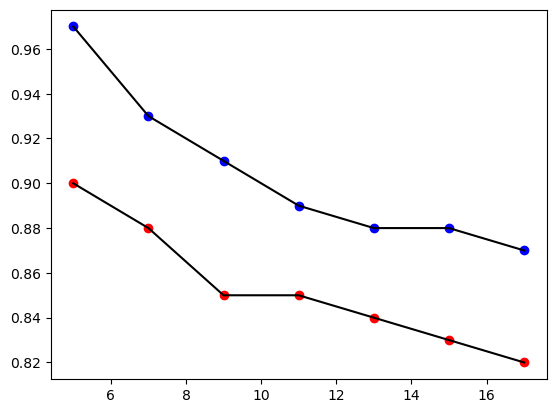

In [19]:
import matplotlib.pyplot as plt
plt.scatter(range(5, 18, 2),training_accuracy_list,color='blue')
plt.plot(range(5, 18, 2),training_accuracy_list,color='black')
plt.scatter(range(5, 18, 2),test_accuracy_list,color='red')
plt.plot(range(5, 18, 2),test_accuracy_list,color='black')
plt.show()


 - k=11 or 13 is good for this model

# interview questions

# 1. What are the key hyperparameters in KNN?

1. Number of neighbors (k):

 - Controls the smoothness of the decision boundary.

 - A smaller k leads to a more complex boundary and may result in overfitting.

 - A larger k leads to a simpler boundary and may result in underfitting.

2. Distance metric:
    
 - Determines how distances between data points are calculated.
     
 - Common choices include Euclidean distance, Manhattan distance, and Chebyshev distance.

3. Choice of weighting:

 - Uniform weighting: All neighbors are given equal importance.

 - Distance weighting: Closer neighbors are given more importance.

4. Choice of algorithm:

 - Brute force: Exhaustively computes the distance between each pair of data points.
    
 - KD-tree: Uses a data structure to efficiently find nearest neighbors.

 - Ball tree: Uses a data structure to efficiently find nearest neighbors within a certain radius.


# 2. What distance metrics can be used in KNN?

In [38]:

# Common distance metrics used in KNN:

distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine', 'mahalanobis']

# Print the list of distance metrics
print("Distance metrics:", distance_metrics)


Distance metrics: ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine', 'mahalanobis']
